## 1. Загрузка данных

Загрузим данные, импортируем нужные библиотеки, проверим датафрейм на пустые значения и дубликаты

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
df = pd.read_csv('/datasets/gym_churn.csv')

In [5]:
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [7]:
df.duplicated().sum()

0

Дубликатов и пустых значений не обнаружено. Прежде чем перейти к анализу, понизим регистры у названий столбцов для удобства

In [8]:
df = df.rename(columns = str.lower)

## 2. Проведём исследовательский анализ данных

- Для начала взглянем на средние значения и стандартные отклонения

In [9]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


По таблице можно заметить, что среднестатистическому клиенту фитнес-центра 29 лет, живёт или работает рядом с залом, а также покупает абонемент на 1 месяц и посещает занятия около двух раз в неделю. Не посещает групповые занятия, нету скидок, а его "время жизни" составляет в среднем от 3 до 4 месяцев. Среднестатистический клиент при этом в отток не попадает.

- Теперь поделим данные на тех, кто ушёл в отток и тех, кто остался. А после взглянем на средние значения каждого признака в двух группах

In [10]:
df.groupby(['churn']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


- Теперь посмотрим на распределения тех, кто ушёл и тех, кто остался. Для этого построим столбчатые диаграммы и гистограммы.
  Начнём с распределения по полу

In [11]:
df_churn_1 = df.query('churn == 1')

In [12]:
df_churn_0 = df.query('churn == 0')

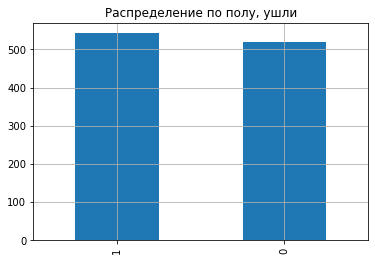

In [13]:
df_churn_1['gender'].value_counts().plot(kind = 'bar', grid = True, title = 'Распределение по полу, ушли')

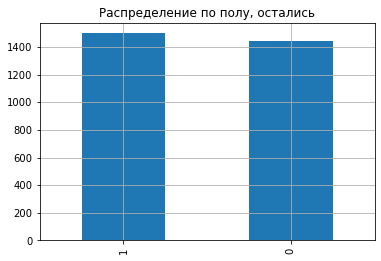

In [14]:
df_churn_0['gender'].value_counts().plot(kind = 'bar', grid = True, title = 'Распределение по полу, остались')

По графикам видно, что распределение мужчин и женщин в фитнес-центре одинаковое и на отток никак не влияет.

Далее необходимо отметить, что некоторые значения будут иметь бинарный вид, поэтому стоит прояснить:

0 - означает "Нет"

1 - означает "Да"



#### Посмотрим, влияет ли на отток расположение фитнес-центра рядом с домом или работой

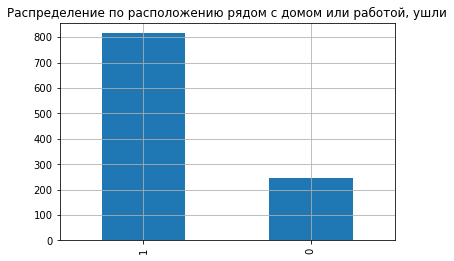

In [15]:
df_churn_1['near_location'].value_counts().plot(kind = 'bar', grid = True, 
                                         title = 'Распределение по расположению рядом с домом или работой, ушли')

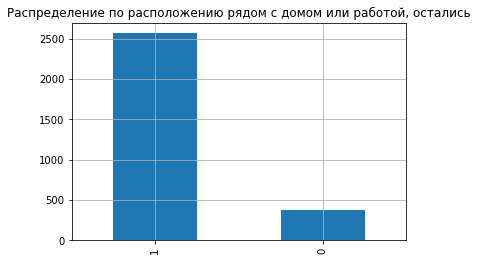

In [16]:
df_churn_0['near_location'].value_counts().plot(kind = 'bar', grid = True, 
                                         title = 'Распределение по расположению рядом с домом или работой, остались')

Нет, не влияет. Стоит отметить, что большинство выбирают фитнес-центр в районе своего дома или работы.

#### Взглянем на клиентов, которые являются сотрудниками компании-партнёра клуба и могут получать скидки 

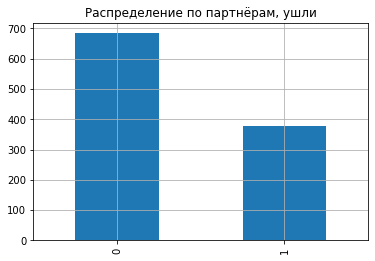

In [17]:
df_churn_1['partner'].value_counts().plot(kind = 'bar', grid = True, title = 'Распределение по партнёрам, ушли')

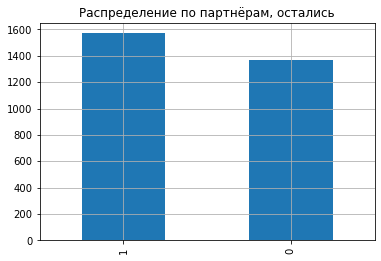

In [18]:
df_churn_0['partner'].value_counts().plot(kind = 'bar', grid = True, title = 'Распределение по партнёрам, остались')

А вот и первая зависимость. По первому графику видно, что в оттоке большинство клиентов, без преимуществ от своей компании. А среди тех кто не попал в отток, большинство людей имеют скидки.

#### Взглянем на распределения среди клиентов, которые попали в фитнес-центр по акции "Приведи друга"

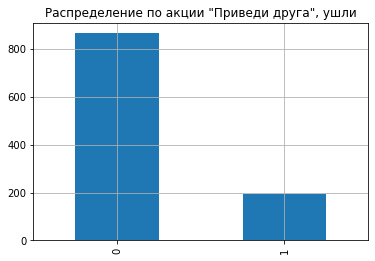

In [19]:
df_churn_1['promo_friends'].value_counts().plot(kind = 'bar', grid = True, 
                                                title = 'Распределение по акции "Приведи друга", ушли')

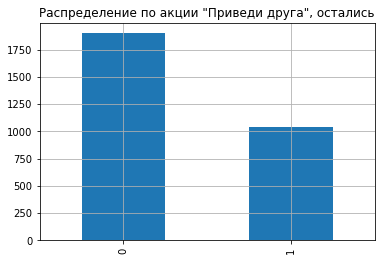

In [20]:
df_churn_0['promo_friends'].value_counts().plot(kind = 'bar', grid = True,
                                                title = 'Распределение по акции "Приведи друга", остались')

Разницы в распределениях нет.

#### Теперь взглянем на тех, кто оставил номер своего контактного телефона

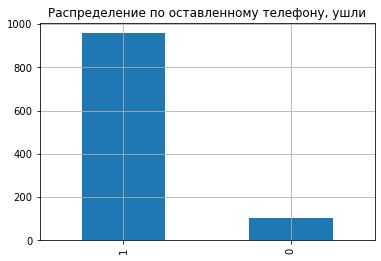

In [21]:
df_churn_1['phone'].value_counts().plot(kind = 'bar', grid = True, title = 'Распределение по оставленному телефону, ушли')

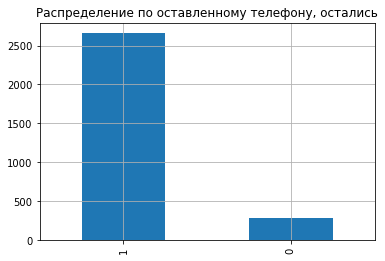

In [22]:
df_churn_0['phone'].value_counts().plot(kind = 'bar', grid = True, 
                                        title = 'Распределение по оставленному телефону, остались')

Здесь также нет зависимостей.

#### Взглянем на распределения среди длительности абонемента

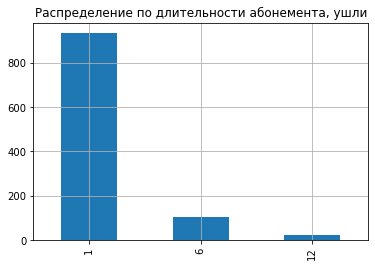

In [23]:
df_churn_1['contract_period'].value_counts().plot(kind = 'bar', grid = True, 
                                                title = 'Распределение по длительности абонемента, ушли')

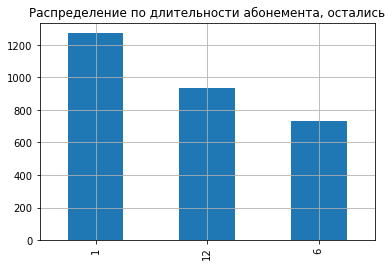

In [24]:
df_churn_0['contract_period'].value_counts().plot(kind = 'bar', grid = True, 
                                                title = 'Распределение по длительности абонемента, остались')

В данном случае есть небольшая зависимость. На первом графике среди оттока лидирует 1 месяц, далее идёт 6 и 12. Во втором также лидирует абонемент на 1 месяц, но при этом тех кто занимается 12 месяцев больше, чем тех кто занимается 6.

#### Далее взглянем на распределения по посещениям групповых занятий

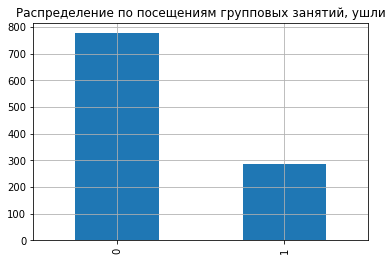

In [25]:
df_churn_1['group_visits'].value_counts().plot(kind = 'bar', grid = True, 
                                               title = 'Распределение по посещениям групповых занятий, ушли')

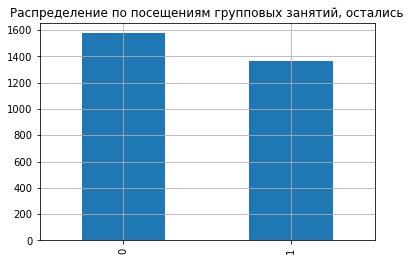

In [26]:
df_churn_0['group_visits'].value_counts().plot(kind = 'bar', grid = True, 
                                               title = 'Распределение по посещениям групповых занятий, остались')

Тут можно отметить, что клиентов попавших в отток мало интересуют группвые занятия, в отличие от тех кто остался.

#### Далее следует взглянуть на распределение возраста между группами

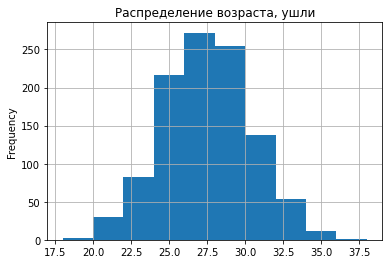

In [27]:
df_churn_1['age'].plot(kind = 'hist', grid = True, title = 'Распределение возраста, ушли')

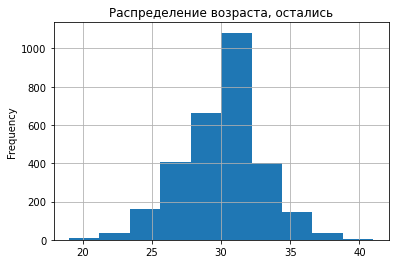

In [28]:
df_churn_0['age'].plot(kind = 'hist', grid = True, title = 'Распределение возраста, остались')

На первом графике можно наблюдать нормальное распределение возрастов, больше всего клиентов от 26 до 30 лет. На втором графике, больше всего людей в возрасте от 30 до 32. По итогу, в основном в отток попадают все возраста и более молодые, тогда как остаются в основном люди за 30.

#### Теперь взглянем на распределение суммарной выручки от других услуг фитнес-центра

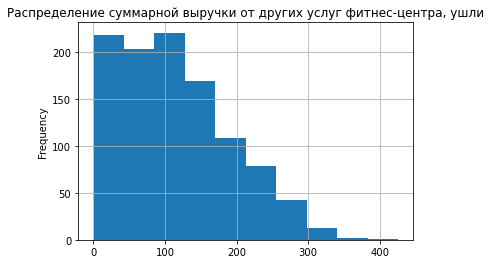

In [29]:
df_churn_1['avg_additional_charges_total'].plot(kind = 'hist', grid = True,
                                            title = 'Распределение суммарной выручки от других услуг фитнес-центра, ушли')

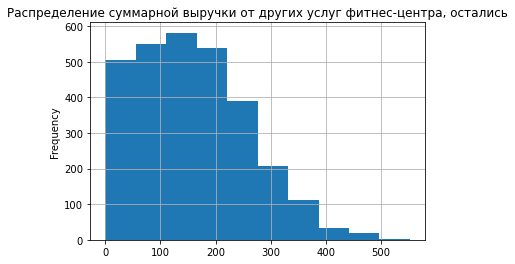

In [30]:
df_churn_0['avg_additional_charges_total'].plot(kind = 'hist', grid = True,
                                        title = 'Распределение суммарной выручки от других услуг фитнес-центра, остались')

В распределениях присутствуют небольшие выбросы, а также ожидаемо те кто остаются в среднем тратят больше денег в отличие от оттока.

#### Посмотрим на распределение срока до окончания действующего текущего абонемента

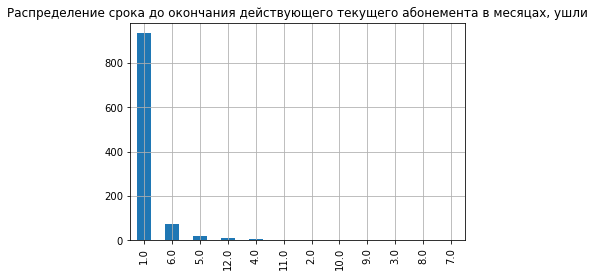

In [31]:
df_churn_1['month_to_end_contract'].value_counts().plot(kind = 'bar', grid = True,
                                title = 'Распределение срока до окончания действующего текущего абонемента в месяцах, ушли')

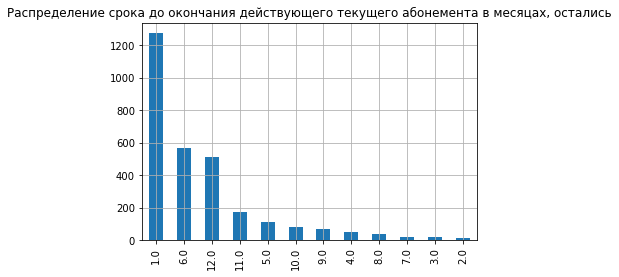

In [32]:
df_churn_0['month_to_end_contract'].value_counts().plot(kind = 'bar', grid = True, 
                            title = 'Распределение срока до окончания действующего текущего абонемента в месяцах, остались')

Ожидаемо, чаще всего уходят клиенты со сроком окончания абонемента в один месяц. Скорее всего это и есть абонемент на 1 месяц.

#### Далее идёт распределение "времени жизни" клиента в месяцах

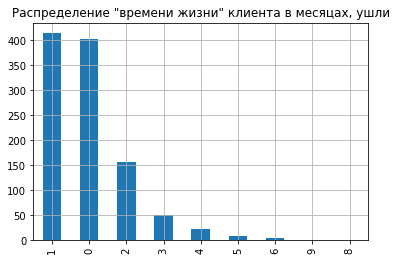

In [33]:
df_churn_1['lifetime'].value_counts().plot(kind = 'bar', grid = True,
                                           title = 'Распределение "времени жизни" клиента в месяцах, ушли')

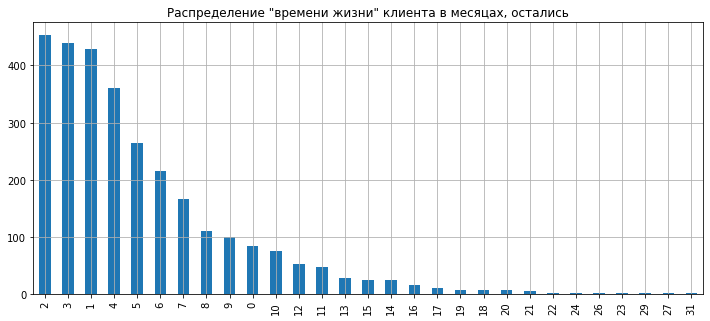

In [34]:
df_churn_0['lifetime'].value_counts().plot(kind = 'bar', grid = True, figsize = (12,5), 
                                           title = 'Распределение "времени жизни" клиента в месяцах, остались')

Здесь также ожидаемо, что клиенты в оттоке "долго не живут".

#### Посмотрим на распределение средней частоты посещений

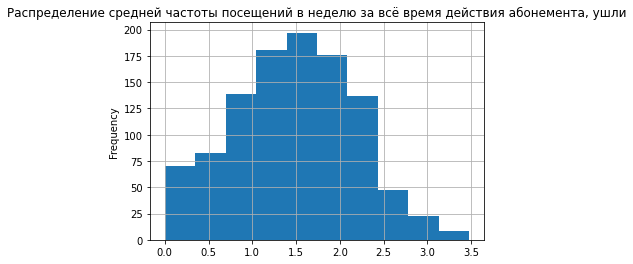

In [35]:
df_churn_1['avg_class_frequency_total'].plot(kind = 'hist', grid = True, 
                        title = 'Распределение средней частоты посещений в неделю за всё время действия абонемента, ушли')

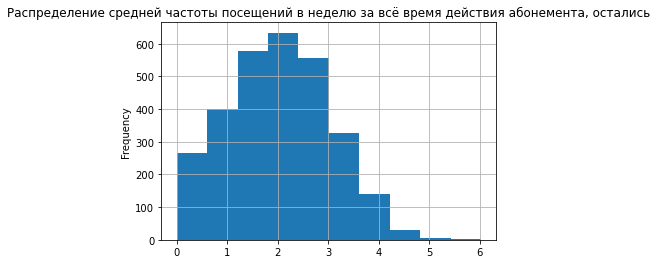

In [36]:
df_churn_0['avg_class_frequency_total'].plot(kind = 'hist', grid = True, 
                    title = 'Распределение средней частоты посещений в неделю за всё время действия абонемента, остались')

В обоих случаях распределения похожи на нормальное. Только во втором случае от тех кто остался видна стабильность, тогда как в оттоке клиенты посещают зал по разному графику.

#### Теперь посмотрим на распределение средней частоты посещений в неделю за месяц

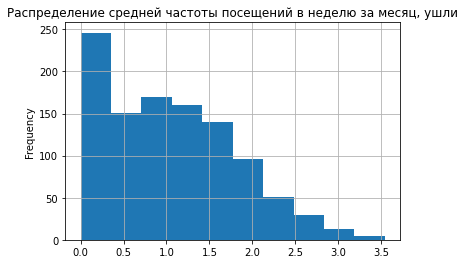

In [37]:
df_churn_1['avg_class_frequency_current_month'].plot(kind = 'hist', grid = True, 
                                                title = 'Распределение средней частоты посещений в неделю за месяц, ушли')

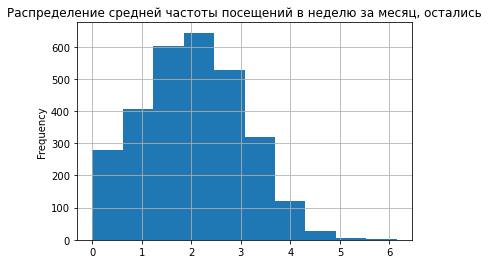

In [38]:
df_churn_0['avg_class_frequency_current_month'].plot(kind = 'hist', grid = True, 
                                            title = 'Распределение средней частоты посещений в неделю за месяц, остались')

Если среди оставшихся график похож на нормальное распределение, то в оттоке в среднем довольно мало клиентов ходило в зал хотябы два раза в неделю.

- Теперь построим матрицу корреляций и отобразим её

In [39]:
df.corr()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


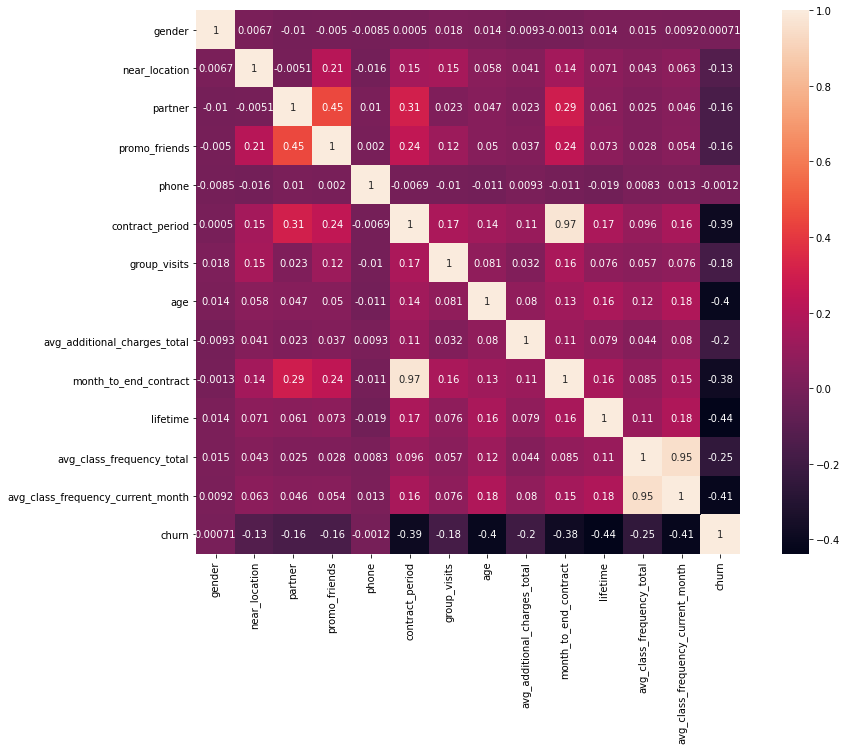

In [40]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot = True, square=True)

На довольно сильную корреляцию указывают такие пары, как: длительноть абонемента с его окончанием и частотам посещений в неделю за всё время действия абонемента и за месяц.

### Вывод

Стоит отметить, что клиенты находящиеся в оттоке ожидаемо не тратят много времени и сил на занятия, в то же время те кто не попали в отток, тратят больше денег и времени в фитнес-центре. Судя по такому зависимому признаку, как скидки на абонементы сотрудникам компаний, которые являюся партнёрами фитнес-центра, возможно стоит уделить больше времени стратегии мотивации и удержанию клиентов в первый месяц занятий. 

## 3. Построим модель прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце (`churn`). Для этого импортируем нужные для построения модели библиотеки

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Укажем переменные. За X возьмём признаки, за y - целевую переменную

In [45]:
X = df.drop('churn', axis = 1)

In [46]:
y = df['churn']

- Разобьём данные на обучающую и валидационную выборку функцией `train_test_split`

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

- Обучим модель на train-выборке двумя способами: логистической регрессией и случайным лесом

In [48]:
model_reg = LogisticRegression() 

In [49]:
model_forest = RandomForestClassifier(n_estimators = 100, random_state = 0)

In [50]:
model_reg.fit(X_train, y_train,)

C:\Users\LOL12\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
model_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

- Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке.

Начнём с логистической регрессии

In [52]:
y_pred_reg = model_reg.predict(X_test)

In [53]:
y_pred_forest = model_forest.predict(X_test)

In [54]:
accuracy_score(y_test, y_pred_reg)

0.90875

In [55]:
precision_score(y_test, y_pred_reg)

0.8238341968911918

In [56]:
recall_score(y_test, y_pred_reg)

0.803030303030303

Логистическая регрессия показала долю правлиьных ответов в 93%. При этом доля правильных ответов среди целевого класса равна 86%. Доля реальных объектов 1 класса равна 83%.

Оценим те же метрики на модели случайного леса

In [57]:
accuracy_score(y_test, y_pred_forest)

0.91625

In [58]:
precision_score(y_test, y_pred_forest)

0.8393782383419689

In [59]:
recall_score(y_test, y_pred_forest)

0.8181818181818182

В данном случае, случайный лес показал параметр accuracy - 92%, precision - 84%, recall - 82%, что являются немного хуже показателей предыдущей модели хоть и recall_score показал в лесу чуть более высокую точность

## 4. Кластеризация клиентов

Проведём кластеризацию клиентов. Для начала импортируем для этого нужные библиотеки

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
from sklearn.cluster import KMeans

In [62]:
from scipy.cluster.hierarchy import dendrogram, linkage

- Стандартизируем данные

In [63]:
sc = StandardScaler()

In [64]:
X_sc = sc.fit_transform(X)

- Построим матрицу расстояний функцией `linkage()` на стандартизованной матрице признаков и нарисуем дендрограмму

In [65]:
linked = linkage(X_sc, method = 'ward')

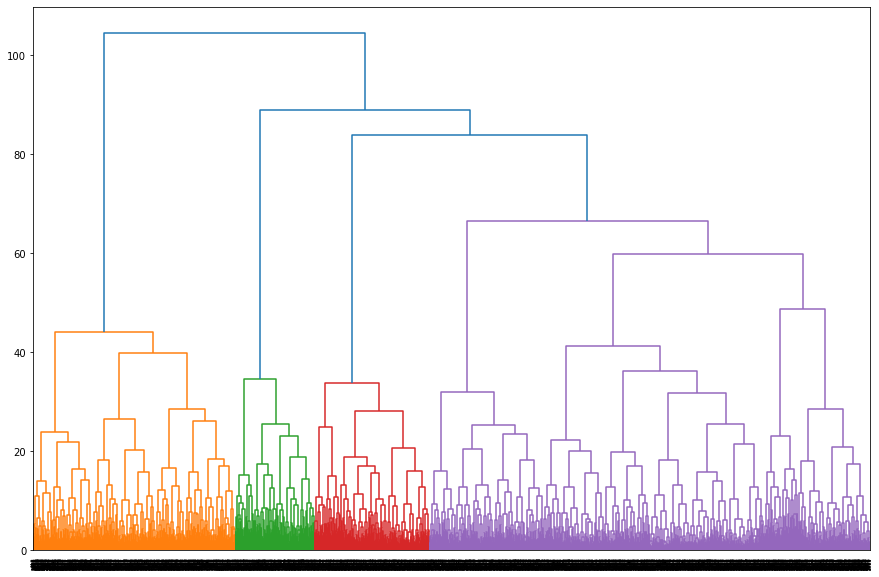

In [66]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

По дендограмме можно вызуально оценить, что оптимальное количество кластеров должно быть 4

- Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов.

Сделаем число кластеров равными 5 и добавим их в таблицу

In [67]:
km = KMeans(n_clusters = 5, random_state = 0)

In [68]:
labels = km.fit_predict(X_sc)

In [69]:
df['clusters'] = labels

- Взглянем на средние значения признаков для кластеров

In [70]:
df.groupby(['clusters']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
clusters,,,,,,,,,,,,,,
0,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
1,0.480787,0.812559,0.000000,0.086223,1.000000,1.866917,0.325211,28.145267,131.369042,1.791003,2.345829,1.325865,1.086883,0.550141
2,0.559567,0.858002,0.338147,0.197353,0.998797,2.730445,0.448857,30.196149,164.579011,2.519856,5.010830,2.928140,2.934140,0.048135
3,0.509603,0.750320,1.000000,0.451985,1.000000,2.554417,0.303457,28.499360,129.812508,2.370038,2.832266,1.355379,1.176172,0.395647
4,0.495726,0.943376,0.752137,0.541667,1.000000,11.352564,0.564103,29.993590,164.563799,10.376068,4.817308,2.028169,2.020129,0.023504


По таблице видно, что кластеры под номером 1 и 3 являюся кластерами оттока

- Построим распределения признаков по кластерам

#### Начнём с пола

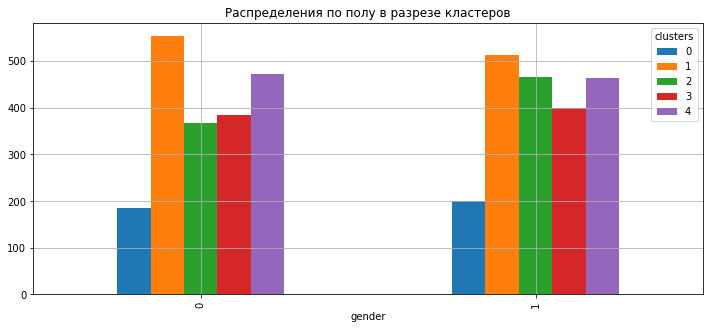

In [71]:
df.pivot_table(index = 'gender', columns = 'clusters', values = 'age', aggfunc = 'count')\
.plot(kind = 'bar', grid = True, figsize = (12,5), title = 'Распределения по полу в разрезе кластеров')

Среди пола в распределениях по кластерам особой разницы нет

#### Взглянем на распределения по кластерам среди проживания или работы рядом с фитнес-центром

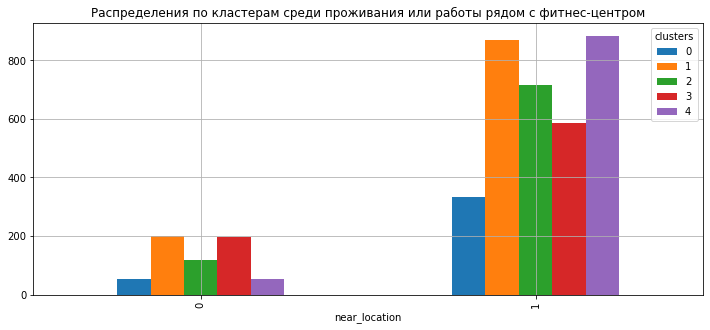

In [72]:
df.pivot_table(index = 'near_location', columns = 'clusters', values = 'age', aggfunc = 'count')\
.plot(kind = 'bar', grid = True, figsize = (12,5), 
      title = 'Распределения по кластерам среди проживания или работы рядом с фитнес-центром')

Судя по распределениям, в нулевом кластере находятся все те, кто не живёт или работает рядом с фитнес-центром или их довольно мало. В остальных кластерах распределения примерно одинаковые.

#### Взглянем на распределения по кластерам среди сотрудников, которые работают в компании-партнёре фитнес-центра

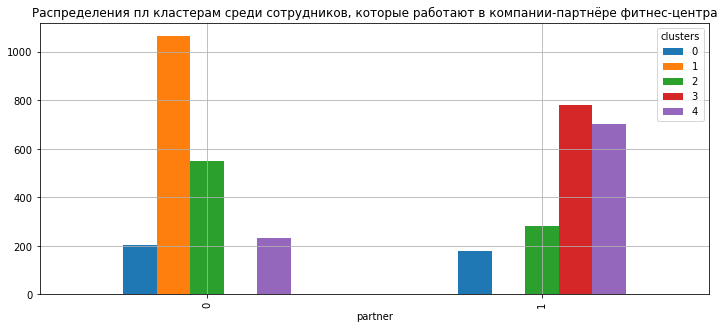

In [73]:
df.pivot_table(index = 'partner', columns = 'clusters', values = 'age', aggfunc = 'count')\
.plot(kind = 'bar', grid = True, figsize = (12,5), 
      title = 'Распределения пл кластерам среди сотрудников, которые работают в компании-партнёре фитнес-центра')

Среди графиков выделяется первый кластер, в котором все клиенты не работают в компании-партнёре.

#### Взглянем на распределения кластеров, в котором клиенты были привлечены за счёт акции "Приведи друга"

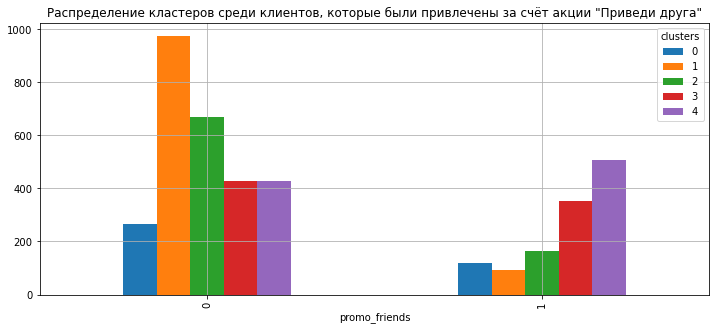

In [74]:
df.pivot_table(index = 'promo_friends', columns = 'clusters', values = 'age', aggfunc = 'count')\
.plot(kind = 'bar', grid = True, figsize = (12,5), title = 
      'Распределение кластеров среди клиентов, которые были привлечены за счёт акции "Приведи друга"')

Здесь также выделяется первый кластер, в нём большинство клиентов не занимаются благодаря акции.

#### Глянем на распределения, показывающие факт оставления номера контактного телефона клиентами

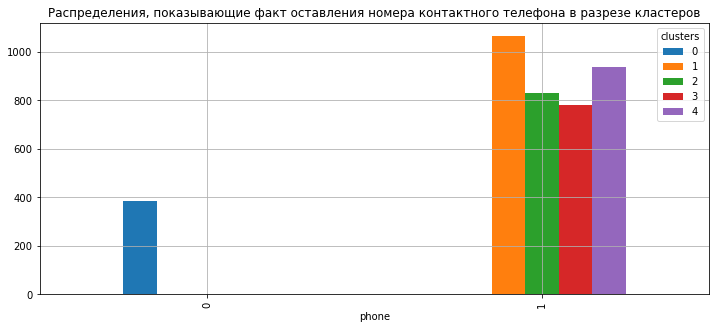

In [75]:
df.pivot_table(index = 'phone', columns = 'clusters', values = 'age', aggfunc = 'count')\
.plot(kind = 'bar', grid = True, figsize = (12,5), 
      title = 'Распределения, показывающие факт оставления номера контактного телефона в разрезе кластеров')

По данным распределениям мало что можно сказать, разве только то, что модель положила тех кто не оставил номер телефона в нулевой кластер.

#### Взглянем на распределения длительности действующего абонемента по кластерам

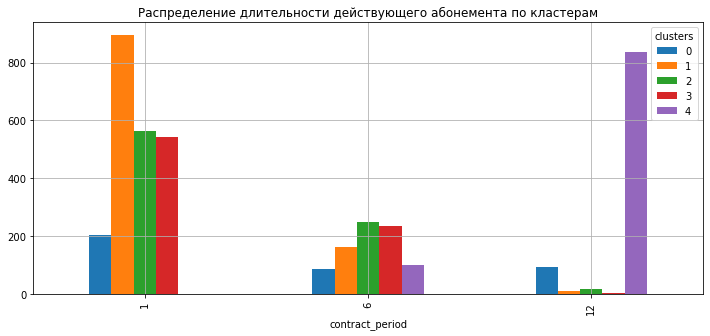

In [76]:
df.pivot_table(index = 'contract_period', columns = 'clusters', values = 'age', aggfunc = 'count')\
.plot(kind = 'bar', grid = True, figsize = (12,5), title = 'Распределение длительности действующего абонемента по кластерам')

Больше всего 12 месяцев занимаются в 4 кластере, а 1 месяц - в первом.

#### Взглянем на распределения факта групповых занятий в разрезе кластеров

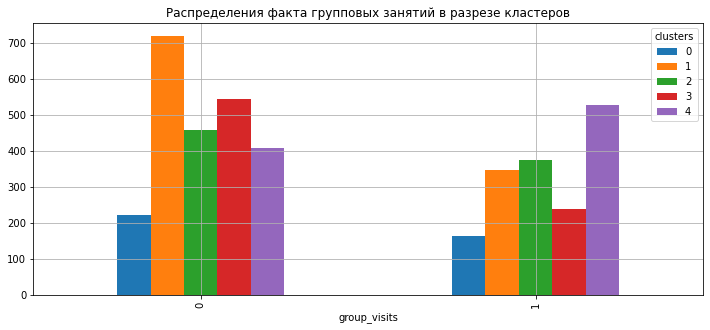

In [77]:
df.pivot_table(index = 'group_visits', columns = 'clusters', values = 'age', aggfunc = 'count')\
.plot(kind = 'bar', grid = True, figsize = (12,5), title = 'Распределения факта групповых занятий в разрезе кластеров')

В первом кластере больше всего людей не посещающих групповые занятия. В то время как в 4 кластере больше всего клиентов, которые их посещают.

#### Посмотрим на распределения по кластерам срока до окончания действующего абонемента

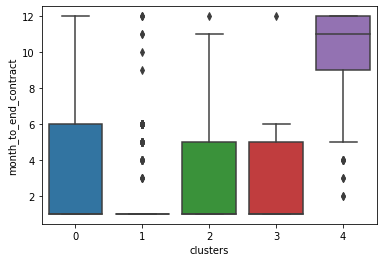

In [78]:
sns.boxplot(x = 'clusters', y = 'month_to_end_contract', data = df)

В 4 кластере находятся клиенты, у которых остался год до окончания абонемента т.е. скорее всего они его недавно приобрели на год. Первый кластер при этом смещён вниз и содержит много выбросов.
#### Взглянем на распределения по кластерам среди "времени жизни" клиентов в месяцах

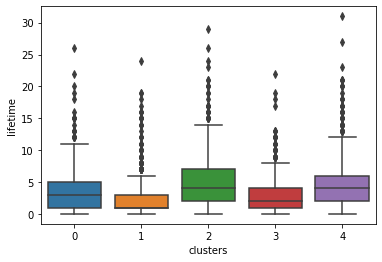

In [79]:
sns.boxplot(x = 'clusters', y = 'lifetime', data = df,)

В каждом распределении можно наблюдать большое количество выбросов.

#### Распределение возраста в разрезе кластеров

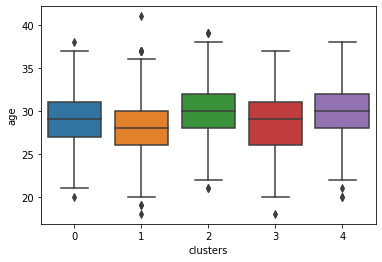

In [80]:
sns.boxplot(x = 'clusters', y = 'age', data = df)

Графики везде показывают примерно нормальное распределение.

#### Распределение суммарной выручки от других услуг фитнес-центра в разере кластеров

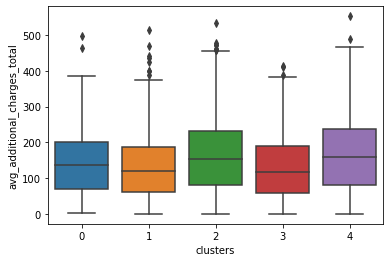

In [81]:
sns.boxplot(x = 'clusters', y = 'avg_additional_charges_total', data = df)

Распределения в целом везде одинаковые.

#### Распределение средней частоты посещений в неделю с начала дейтсвия абонемента среди кластеров

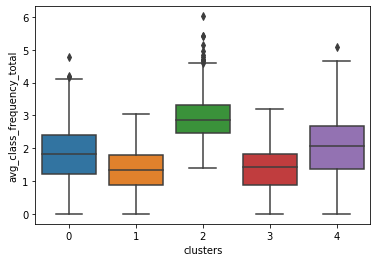

In [82]:
sns.boxplot(x = 'clusters', y = 'avg_class_frequency_total', data = df)

Графики примерно соответсствуют нормальному распределению. Во втором кластере правда можно наблюдать множество выбросов.

#### Распределение средней частоты посещений за неделю за месяц среди кластеров

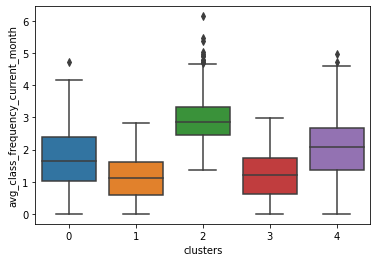

In [83]:
sns.boxplot(x = 'clusters', y = 'avg_class_frequency_current_month', data = df)

Для всех кластеров ситуация примерно соответствует предыдущему графику.

- Посчитаем долю оттока для каждого полученного кластера

In [84]:
df.groupby(['clusters'])['churn'].mean()

clusters
0    0.267532
1    0.550141
2    0.048135
3    0.395647
4    0.023504
Name: churn, dtype: float64

К оттоку в основном склонен первый кластер - в нём уходят больше половины клиентов. Самым надёжным является 4 и 2 кластер, у которых процент оттока всего 2 и 5 процентов соответственно.

In [85]:
df.groupby(['clusters']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
clusters,,,,,,,,,,,,,,
0,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
1,0.480787,0.812559,0.000000,0.086223,1.000000,1.866917,0.325211,28.145267,131.369042,1.791003,2.345829,1.325865,1.086883,0.550141
2,0.559567,0.858002,0.338147,0.197353,0.998797,2.730445,0.448857,30.196149,164.579011,2.519856,5.010830,2.928140,2.934140,0.048135
3,0.509603,0.750320,1.000000,0.451985,1.000000,2.554417,0.303457,28.499360,129.812508,2.370038,2.832266,1.355379,1.176172,0.395647
4,0.495726,0.943376,0.752137,0.541667,1.000000,11.352564,0.564103,29.993590,164.563799,10.376068,4.817308,2.028169,2.020129,0.023504


## 5. Общий вывод

Среди клиентов, готовых на долгое сотрудничество, можно выделить два типа:

1. Первый тип такой, который посещает фитнес-центр 2-3 раза в неделю. Если человек настолько часто ходит в зал, скорее всего у него есть на это личные причины.

2. Второй тип этот тот, который видит выгодное предложение. То есть, это скидки на абонемент за счёт компаний-партнёров, либо акции "Приведи друга". Они часто покупает абонемент сразу на 12 месяцев, посещают групповые занятия и посещают зал 2 раза в неделю.

Клиентов попавших в отток можно охарактеризовать как клиентов без достаточной мотивации. Они похожи на первый тип людей не попваших в отток, с единственным отличием - они ходят в зал 1 раз в неделю. 

Для токого типа людей, помимо личной мотивации, необходима дополнительная мотивация в виде скидок и акций. Возможно, стоит расширить круг компаний-партнёров и расширить количество акций. За посещение групповых занятий также желательно ввести скидки, так как такой тип людей довольно мало их посещает. Непосредственно в группе чедовек может замативироваться ещё сильнее. Также можно подумать насчёт введения 3-х месячного не дорогого абонемента для людей пришедших в фитнес-центр первый раз, это также может дополнительно замотивировать.

Ещё было бы круто придумать бонусы для тех, кто в течении долгого времени посещает зал больше 1 раза в неделю.
